# Two Spiral Classification Problem

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score
%matplotlib inline

def two_spirals(n_points, noise=.5):
    """
     Returns the two spirals dataset.
    """
    n = np.sqrt(np.random.rand(n_points,1)) * 780 * (2*np.pi)/360
    d1x = -np.cos(n)*n + np.random.rand(n_points,1) * noise
    d1y = np.sin(n)*n + np.random.rand(n_points,1) * noise
    return (np.vstack((np.hstack((d1x,d1y)),np.hstack((-d1x,-d1y)))), 
            np.hstack((np.zeros(n_points),np.ones(n_points))))

def plot_two_spirals(x1, y1, title1, x2, y2, title2):
    plt.subplot(1,2,1)
    plt.title(title1)
    plt.plot(x1[y1==0,0], x1[y1==0,1], 'b.')
    plt.plot(x1[y1==1,0], x1[y1==1,1], 'r.')
    plt.subplot(1,2,2)
    plt.title(title2)
    plt.plot(x2[y2==0,0], x2[y2==0,1], '.')
    plt.plot(x2[y2==1,0], x2[y2==1,1], '.')
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


In [2]:
#training data
X_train, y_train = two_spirals(1000,0.3)
#test data
X_test, y_test = two_spirals(500,0.8)

X_train[0]: [-11.6523932    5.88331712]
y_train[0]: 0.0


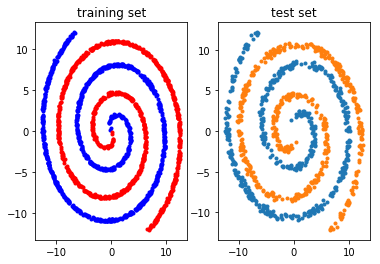

In [3]:
#visualize data
print(f"X_train[0]: {X_train[0]}")
print(f"y_train[0]: {y_train[0]}")
plot_two_spirals(X_train, y_train, 'training set', X_test, y_test, 'test set')

In [4]:
from keras.models import Sequential

#mode definition
model = Sequential()


from keras.layers import Dense

#input layer
model.add(Dense(12, input_dim=2, activation='tanh'))

#hidden layers
model.add(Dense(12, activation='tanh'))

#TODO: add another layer by uncommenting the line below and see why an additional layer makes so much difference!
model.add(Dense(12, activation='tanh'))
model.add(Dense(12, activation='tanh'))

#output layer
model.add(Dense(1, activation='sigmoid'))

model.summary()

Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                36        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_3 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_4 (Dense)              (None, 12)                156       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 13        
Total params: 517
Trainable params: 517
Non-trainable params: 0
_________________________________________________________________


In [5]:
#compile
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [6]:
#fit
model.fit(X_train, y_train, epochs=200, batch_size=32, verbose=1)


Epoch 1/200
2000/2000 [==============================] - 0s 161us/step - loss: 0.6992 - acc: 0.5410
Epoch 2/200
2000/2000 [==============================] - 0s 23us/step - loss: 0.6713 - acc: 0.5980
Epoch 3/200
2000/2000 [==============================] - 0s 31us/step - loss: 0.6690 - acc: 0.6030
Epoch 4/200
2000/2000 [==============================] - 0s 32us/step - loss: 0.6678 - acc: 0.6015
Epoch 5/200
2000/2000 [==============================] - 0s 35us/step - loss: 0.6672 - acc: 0.6035
Epoch 6/200
2000/2000 [==============================] - 0s 32us/step - loss: 0.6663 - acc: 0.6040
Epoch 7/200
2000/2000 [==============================] - 0s 33us/step - loss: 0.6657 - acc: 0.6065
Epoch 8/200
2000/2000 [==============================] - 0s 33us/step - loss: 0.6643 - acc: 0.6050
Epoch 9/200
2000/2000 [==============================] - 0s 34us/step - loss: 0.6634 - acc: 0.6110
Epoch 10/200
2000/2000 [==============================] - 0s 35us/step - loss: 0.6625 - acc: 0.6095
Epoch 11

2000/2000 [==============================] - 0s 39us/step - loss: 0.4651 - acc: 0.7485
Epoch 84/200
2000/2000 [==============================] - 0s 32us/step - loss: 0.4548 - acc: 0.7605
Epoch 85/200
2000/2000 [==============================] - 0s 28us/step - loss: 0.4436 - acc: 0.7625
Epoch 86/200
2000/2000 [==============================] - 0s 31us/step - loss: 0.4346 - acc: 0.7910
Epoch 87/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.4244 - acc: 0.8075
Epoch 88/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.4156 - acc: 0.8170
Epoch 89/200
2000/2000 [==============================] - 0s 37us/step - loss: 0.4041 - acc: 0.8290
Epoch 90/200
2000/2000 [==============================] - 0s 38us/step - loss: 0.3898 - acc: 0.8395
Epoch 91/200
2000/2000 [==============================] - 0s 38us/step - loss: 0.3797 - acc: 0.8445
Epoch 92/200
2000/2000 [==============================] - 0s 31us/step - loss: 0.3680 - acc: 0.8510
Epoch 93/200


2000/2000 [==============================] - 0s 37us/step - loss: 0.0307 - acc: 0.9945
Epoch 165/200
2000/2000 [==============================] - 0s 45us/step - loss: 0.0305 - acc: 0.9940
Epoch 166/200
2000/2000 [==============================] - 0s 50us/step - loss: 0.0326 - acc: 0.9920
Epoch 167/200
2000/2000 [==============================] - 0s 43us/step - loss: 0.0273 - acc: 0.9940
Epoch 168/200
2000/2000 [==============================] - 0s 39us/step - loss: 0.0262 - acc: 0.9950
Epoch 169/200
2000/2000 [==============================] - 0s 34us/step - loss: 0.0241 - acc: 0.9945
Epoch 170/200
2000/2000 [==============================] - 0s 34us/step - loss: 0.0249 - acc: 0.9940
Epoch 171/200
2000/2000 [==============================] - 0s 36us/step - loss: 0.0226 - acc: 0.9935
Epoch 172/200
2000/2000 [==============================] - 0s 34us/step - loss: 0.0202 - acc: 0.9955
Epoch 173/200
2000/2000 [==============================] - 0s 34us/step - loss: 0.0200 - acc: 0.9950
Epoc

In [7]:
#predict
y_pred = np.round(model.predict(X_test).T[0])

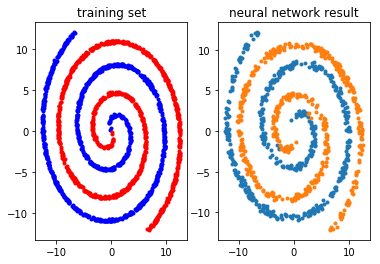

In [8]:
#visualize results
plot_two_spirals(X_train, y_train, 'training set', X_test, y_pred, 'neural network result')

Test Set - F1 Score: 0.994
Test Set - Accuracy: 0.994
Confusion matrix, without normalization
[[497   3]
 [  3 497]]


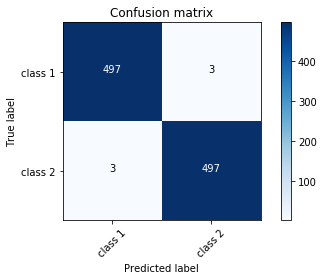

In [9]:
print(f"Test Set - F1 Score: {f1_score(y_test,y_pred)}")
print(f"Test Set - Accuracy: {accuracy_score(y_test, y_pred)}")
plot_confusion_matrix(confusion_matrix(y_test,y_pred), ["class 1","class 2"])